In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [25]:
def SIR(t, z, beta, gamma):
    S, I, R = z
    fraction_of_suseptible = -beta * S * I
    fraction_of_infected = beta * S * I - gamma * I
    fraction_of_recovering = gamma * I
    return [fraction_of_suseptible, fraction_of_infected, fraction_of_recovering]

In [29]:
# Setup initial conditions
init_pop_infected: float = 0.001
init_pop_total: float = 1 - init_pop_infected
init_pop_recoverd: float = 0.0
y0 = [init_pop_total, init_pop_total, init_pop_recoverd]

beta_values = [0.001, 0.1, 0.7,] # Rate of infection
gamma_values = [0.001, 0.01, 0.05]  # Rate of recovery

max_time = 356 # in days
t_span = np.linspace(0, max_time, max_time)

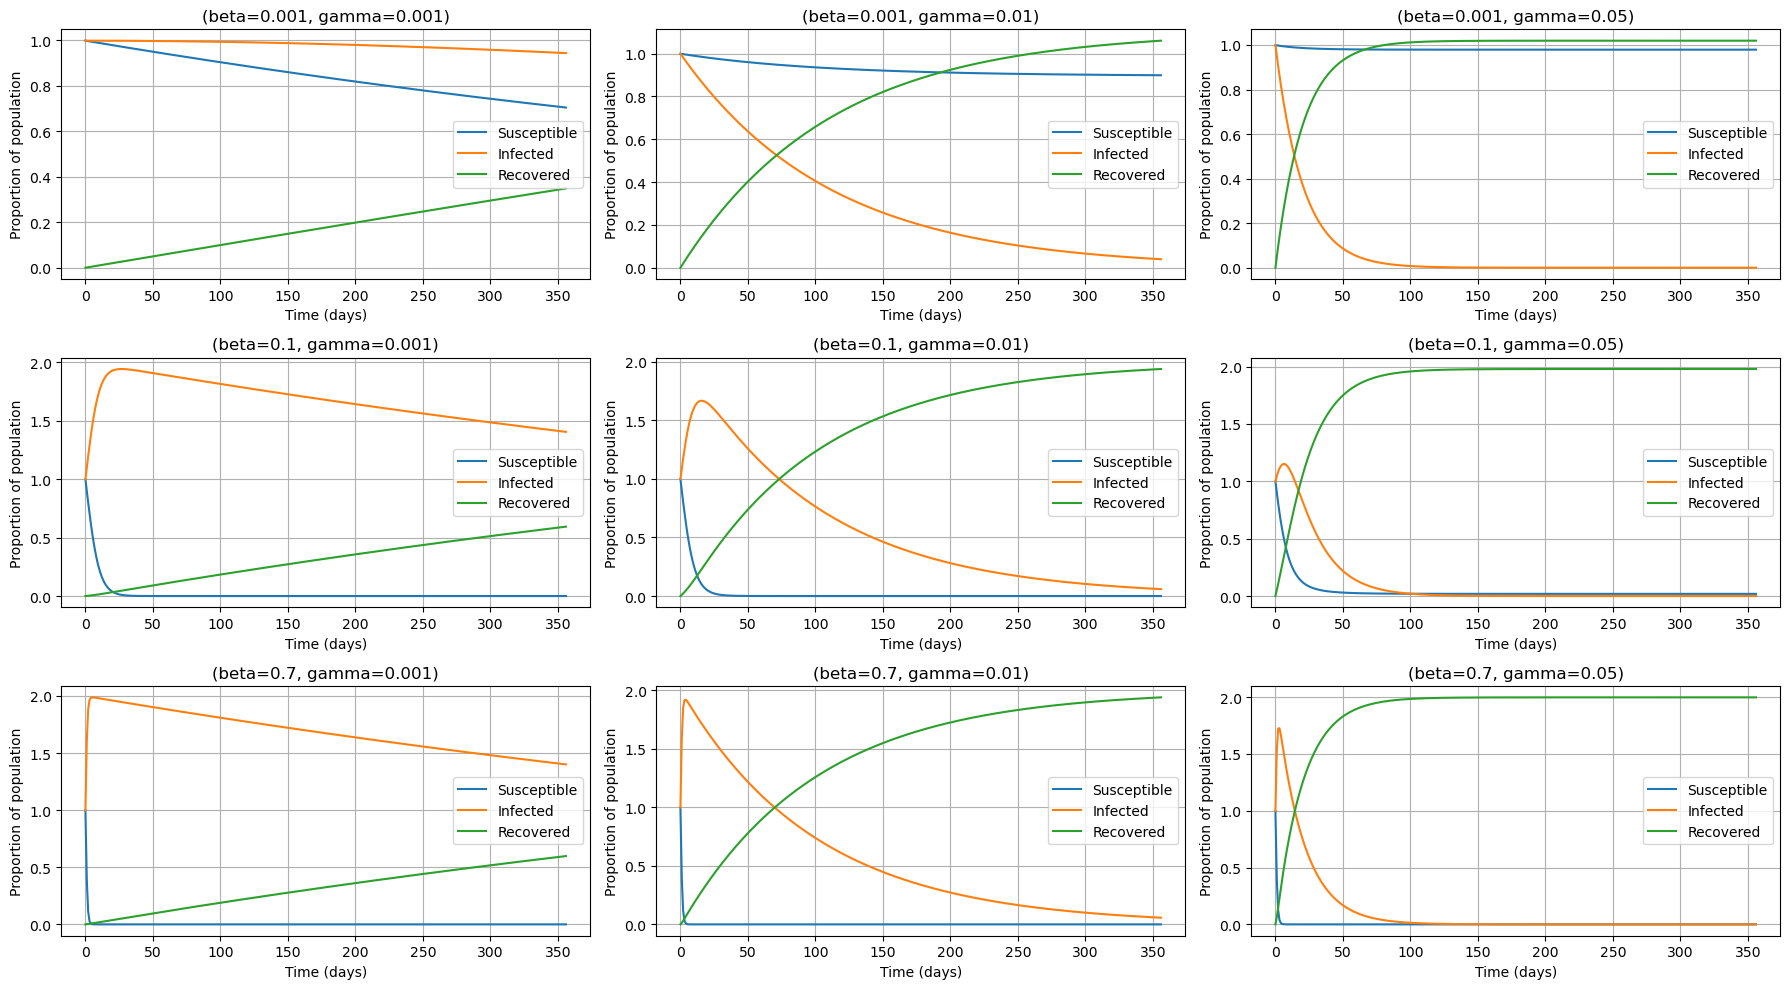

In [41]:
fig, axs = plt.subplots(len(beta_values), len(gamma_values), figsize=(18, 10))
axs = axs.ravel()
i = 0

for beta in beta_values:
    for gamma in gamma_values:
        sol = solve_ivp(SIR, [0, max_time], y0, args=(beta, gamma), dense_output=True)
        S, I, R = sol.sol(t_span)

        axs[i].plot(t_span, S, label="Susceptible")
        axs[i].plot(t_span, I, label="Infected")
        axs[i].plot(t_span, R, label="Recovered")
        axs[i].set_xlabel("Time (days)")
        axs[i].set_ylabel("Proportion of population")
        axs[i].set_title(f"(beta={beta}, gamma={gamma})")
        axs[i].legend()
        axs[i].grid(True)

        i+=1

plt.tight_layout()
plt.show()